# IMPORTING INPORTANT LIBRAIES

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xg
warnings.filterwarnings("ignore")


# IMPORTING DATASET

In [95]:

df = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\flip robo\assessment\project evaluation phase 1\avocardo project\avocado.csv") # Reading the data file
df.head()                 


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [96]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# FEATURES OF DATA SET

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
*  Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

# ROW AND COLUMNS 

In [97]:
print("NUMBER OF ROW : ",df.shape[0])
print("NUMBER OF COLUMNS : ",df.shape[1])

NUMBER OF ROW :  18249
NUMBER OF COLUMNS :  14


# IDENTIFIED THE DATA TYPE

In [98]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

MOST OF THE COLUMNS ARE IN FLOAT EXCEPT "unname","data","type","regio"

# DROP NOT IMPORTANT COLUMNS "unnamed"

In [99]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [100]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# LETS SEEN WHOLE INFORAMTION OF DATASET

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [102]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

THEIR IS NO NULL VALUE IN DATASET 

In [103]:
df.duplicated().sum()

0

no duplicate in dataset

In [104]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [105]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# HEATMAP OF NULL VALIUE

<AxesSubplot:>

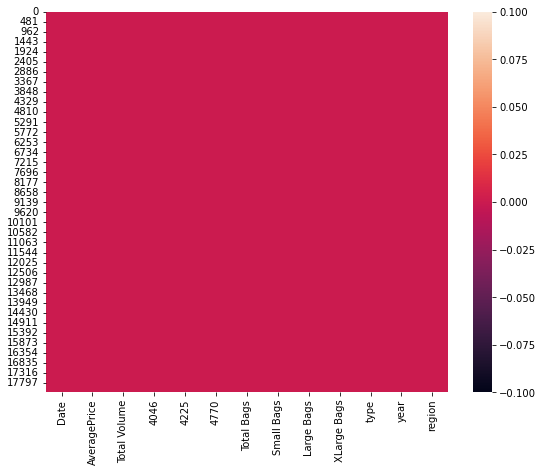

In [106]:
plt.figure(figsize=(9,7))
sns.heatmap(df.isnull())

their is no null value in dataset

# START DATA VISUALIZATION

# 1. TOP 5 COUNTRY WHERE HIGHEST NUMBER OF AVERAGE PRICE 

In [107]:
r=df.groupby(["region"]).sum()

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

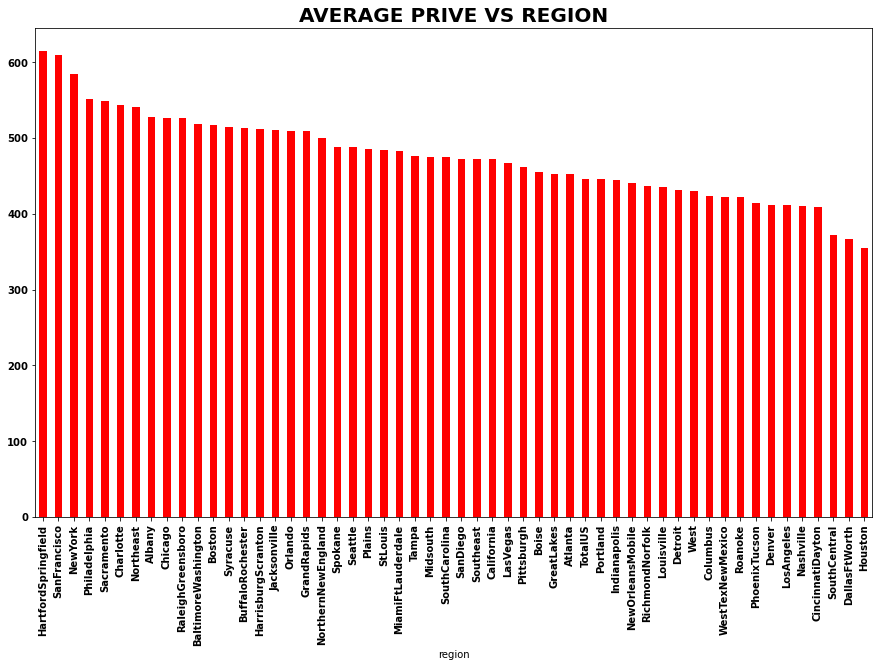

In [108]:
rn=r.sort_values(["AveragePrice"],ascending=False)
plt.figure(figsize=(15,9))
rn["AveragePrice"].plot(kind="bar",color="red")
plt.title("AVERAGE PRIVE VS REGION",fontsize=20,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

OBSERVATION:-here are top 5 country where AVERAGE PRIVE IS VERY HIGH
    
    *ALBANY
    *California
    *Baltimore Washington
    *Boston
    *BuffaloRochester

# 2.TOP COUNTRY WHERE HIGHEST NUMBER OF TOTAL VOLUME 

In [109]:
rt=rn.sort_values(["Total Volume"],ascending=False)

(array([0.e+00, 1.e+09, 2.e+09, 3.e+09, 4.e+09, 5.e+09, 6.e+09, 7.e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

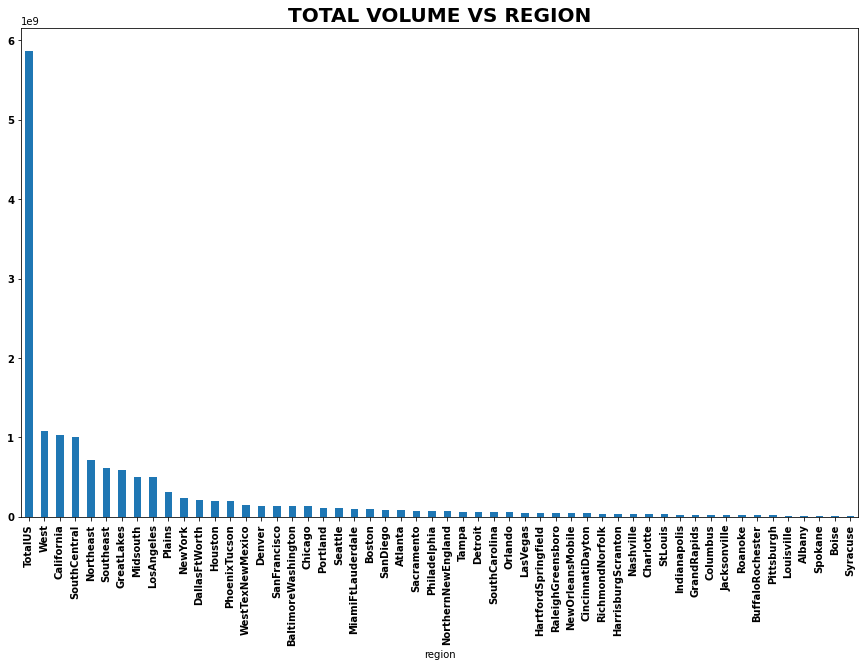

In [110]:
plt.figure(figsize=(15,9))
rt["Total Volume"].plot(kind="bar")
plt.title("TOTAL VOLUME VS REGION",fontsize=20,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

OBSERVATION:-HERE ARE SOME COUNTRY WHERE TOTAL VOLUME IS HIGHESST
    
    *TOTALUS
    *CALIFORNIA
    *WESYT
    *NEW YORK

# 3.) TOP COUNTRY WHERE HIGHEST BAG USED BAGS

In [111]:
rto=r.sort_values(["Total Bags"],ascending=False)

(array([0.0e+00, 2.0e+08, 4.0e+08, 6.0e+08, 8.0e+08, 1.0e+09, 1.2e+09,
        1.4e+09, 1.6e+09, 1.8e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

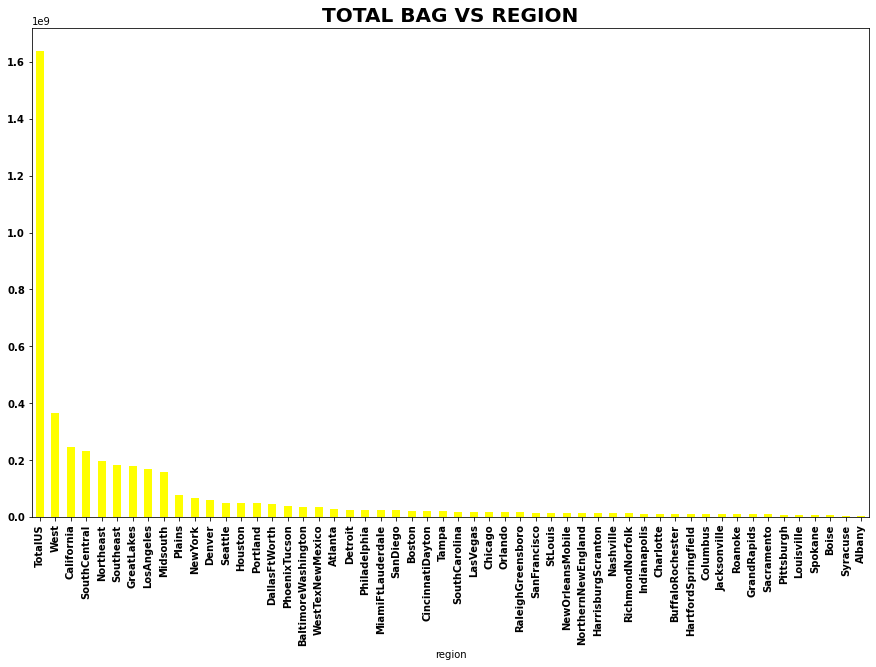

In [112]:
plt.figure(figsize=(15,9))
rto["Total Bags"].plot(kind="bar",color="yellow")
plt.title("TOTAL BAG VS REGION",fontsize=20,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

OBSERAVTION:-
    
    *TOTALUS
    *CALIFORNIA
    *WEST
    *SOUTHCENTRAL

# 4).DENSITY GRAPH

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

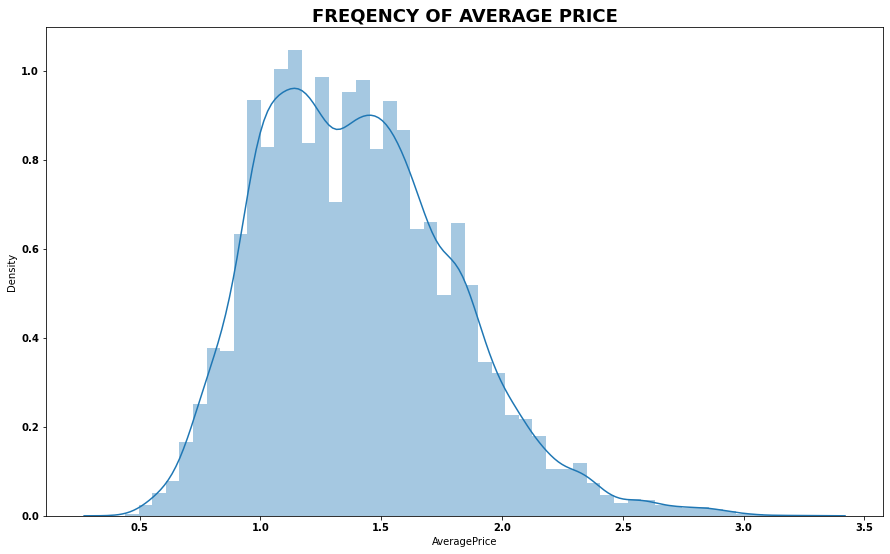

In [113]:
plt.figure(figsize=(15,9))
sns.distplot(df["AveragePrice"])
plt.title("FREQENCY OF AVERAGE PRICE",fontsize=18,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

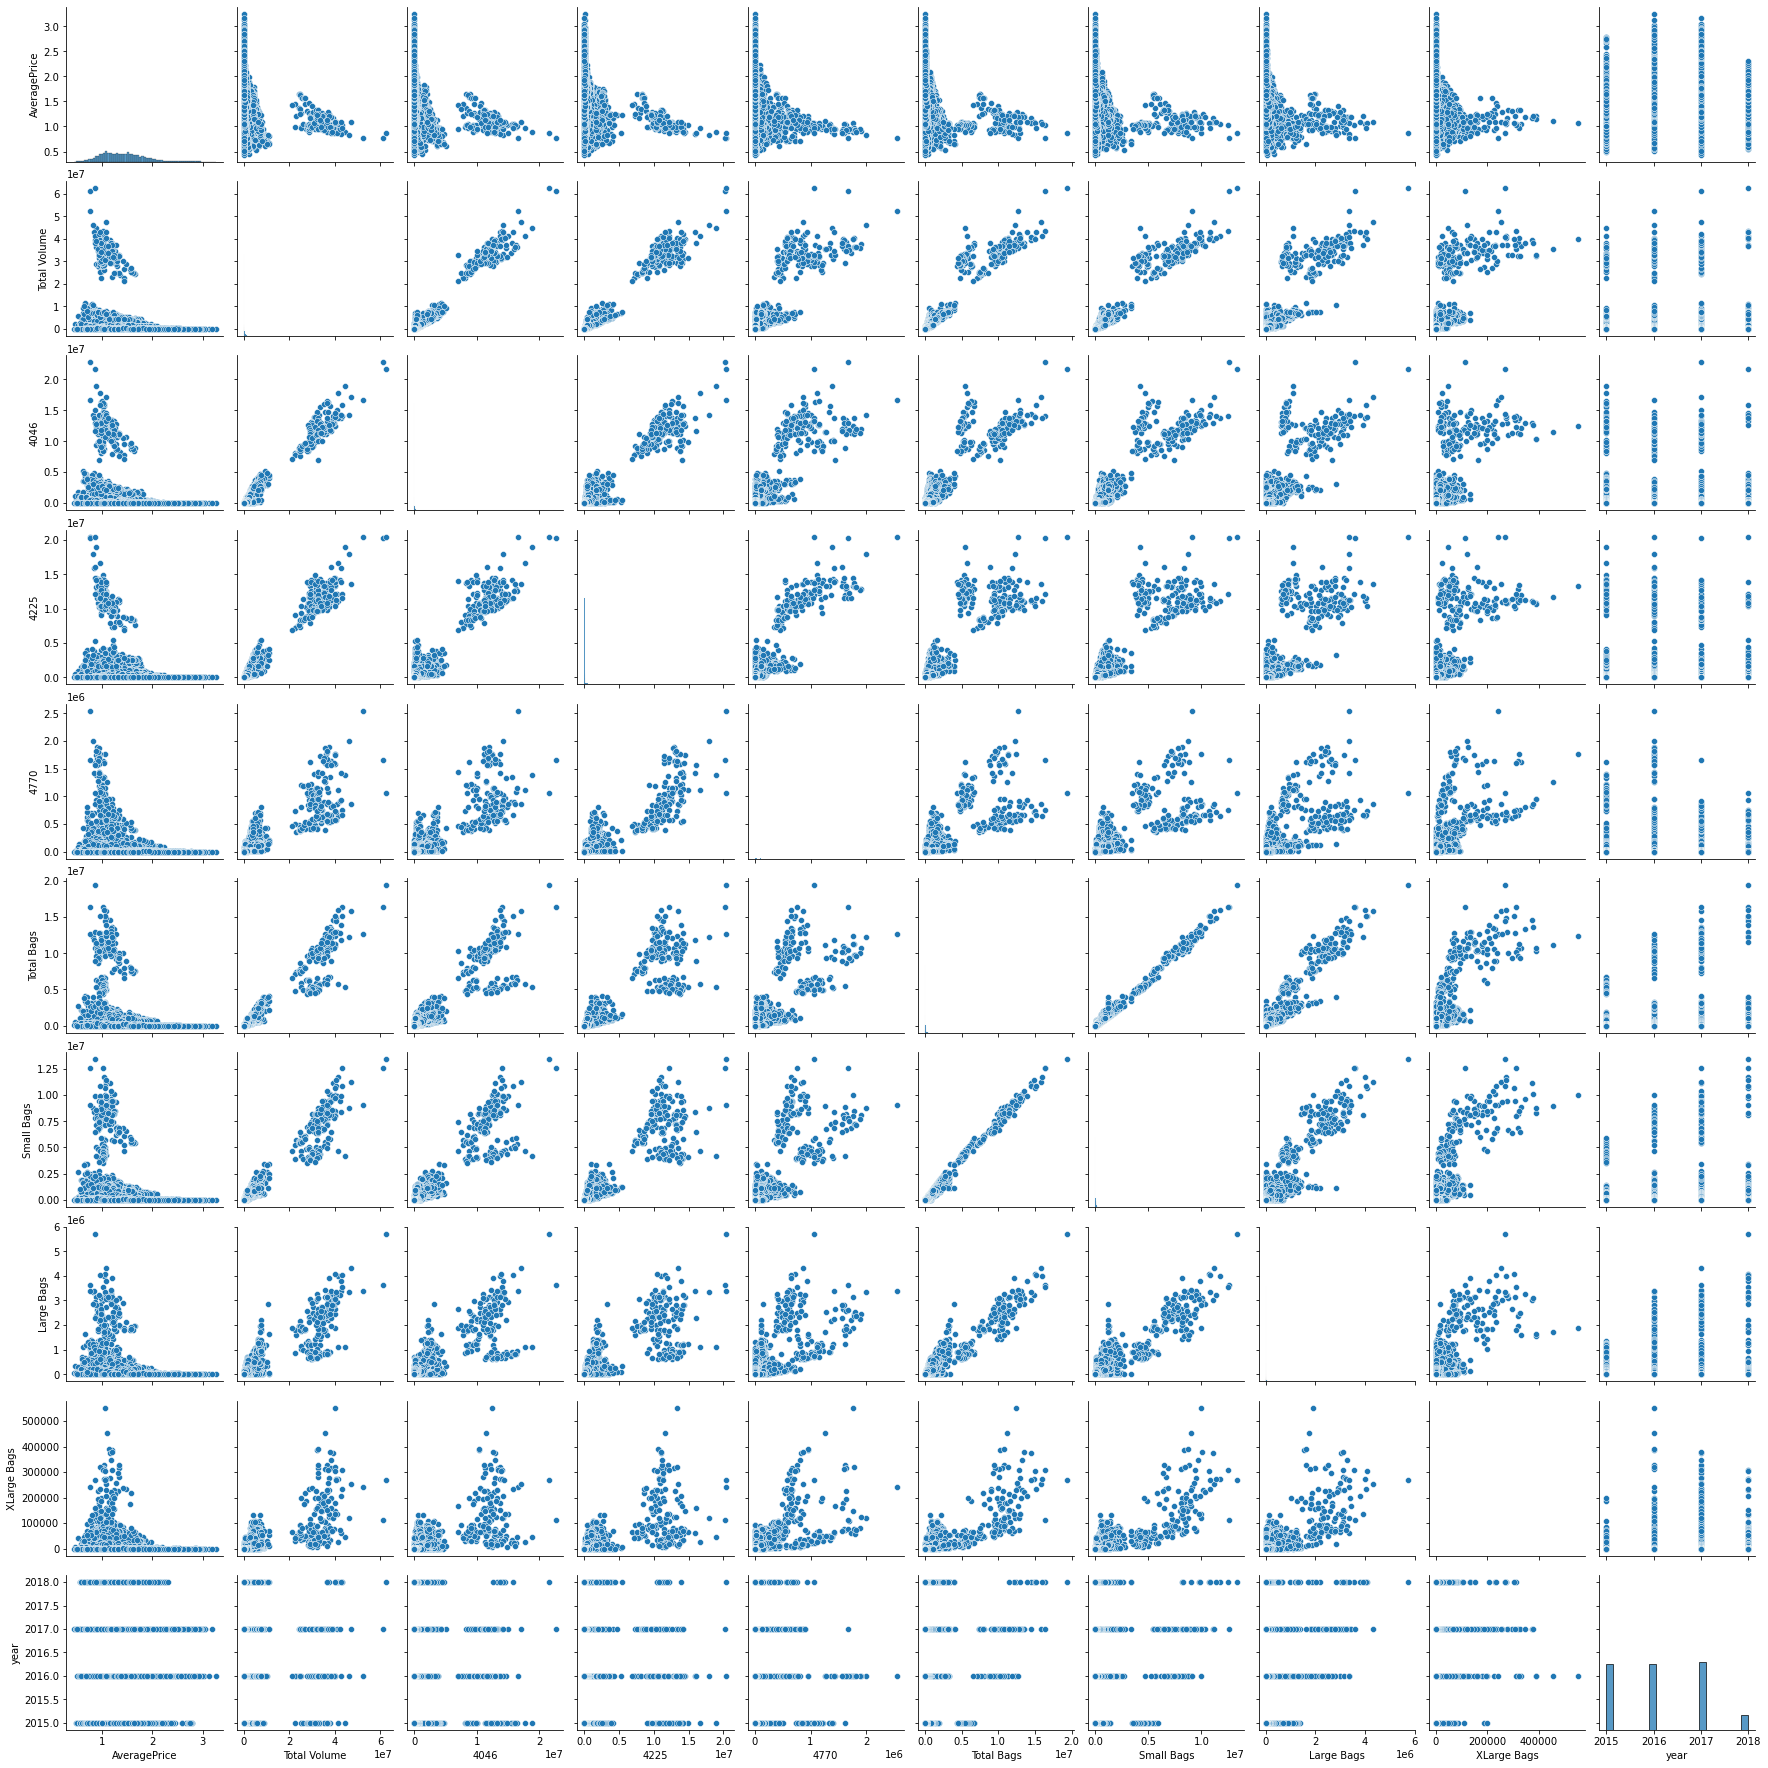

In [114]:
sns.pairplot(df)

# LET UNDERSTAND CORELATION 

In [115]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


# UNDERSTAND ON HEATMAP

<AxesSubplot:>

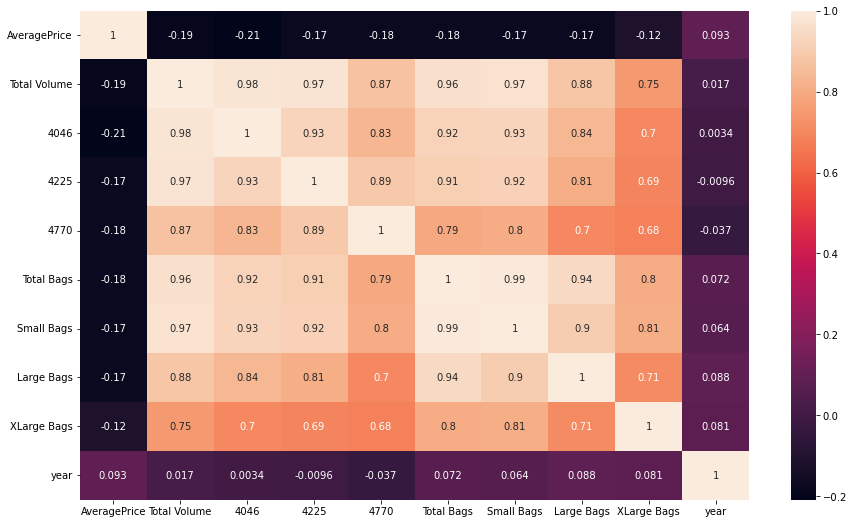

In [116]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

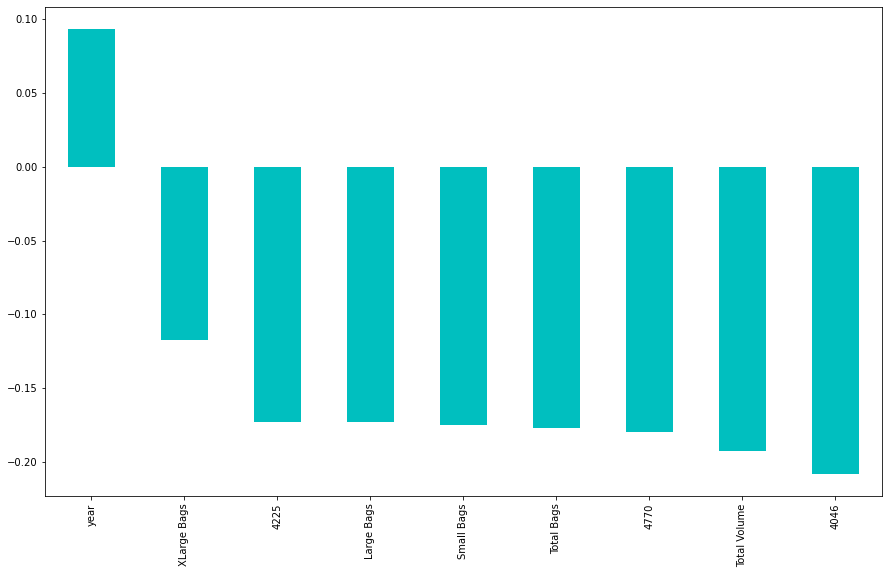

In [117]:
plt.figure(figsize=(15,9))
df.corr()["AveragePrice"].drop(["AveragePrice"]).sort_values(ascending=False).plot(kind="bar",color="c")

AS WE SEEN MOST OF THE FEATURES ARE NEGATIVELY CORELATED
* 4046 IS HIGHLY CORELATED WITH -0.20
* YEAR IS HIGHLY COREALTED WITH 0.15

# DROPING UNNESSARY COLUMNS

AS WE HAVE TWO YEAR COLUMNS "Date","year"we have to remove one of each columns

In [118]:
df.drop("Date",axis=1,inplace=True)

In [119]:
df["type"].nunique()

2

AS WE SEEN TYPE COLUMN IS HAVE ONLY 1 VALUE THEN IT MIGHT BE NOT GAVE HIGH EFFECT ON MODEL SO WE HAVE TO REMOVE IS

In [120]:
df.drop("type",axis=1,inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   year          18249 non-null  int64  
 10  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB


# ENCODING THE DATAFRAME

In [122]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [123]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   year          18249 non-null  int64  
 10  region        18249 non-null  int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 1.5 MB


AS WE SEEN THEIR IS NO OBJECT VALUE IN DATASET

# REMOVE OUTLIER

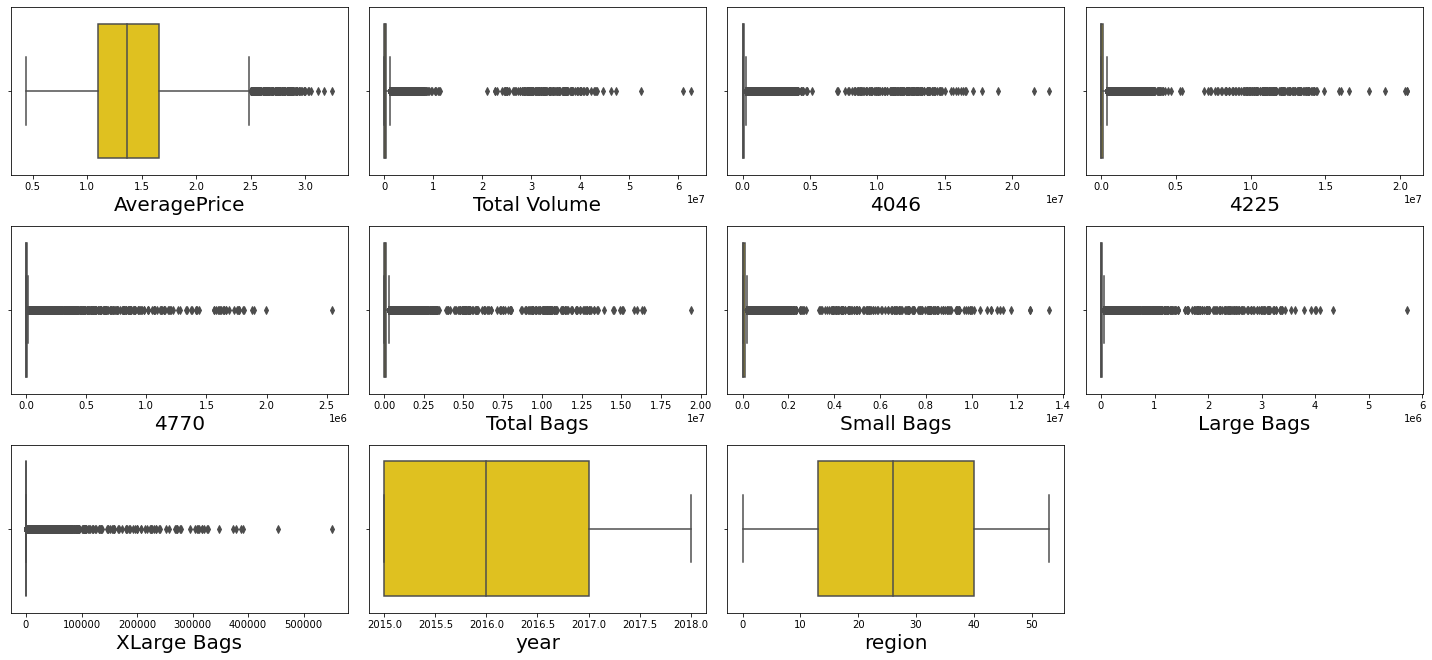

In [125]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [126]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [127]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53


In [128]:
df.shape

(18249, 11)

In [129]:
df_new.shape

(17651, 11)

In [130]:
data_loss=((1517-1436)/1517)*100

In [131]:
data_loss

5.339485827290705

THE DATA IS LOSS BELOW 10% 

# CHECK SKEWNESS

In [132]:
df=df_new

In [133]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
region          0.012798
dtype: float64

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
region             AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

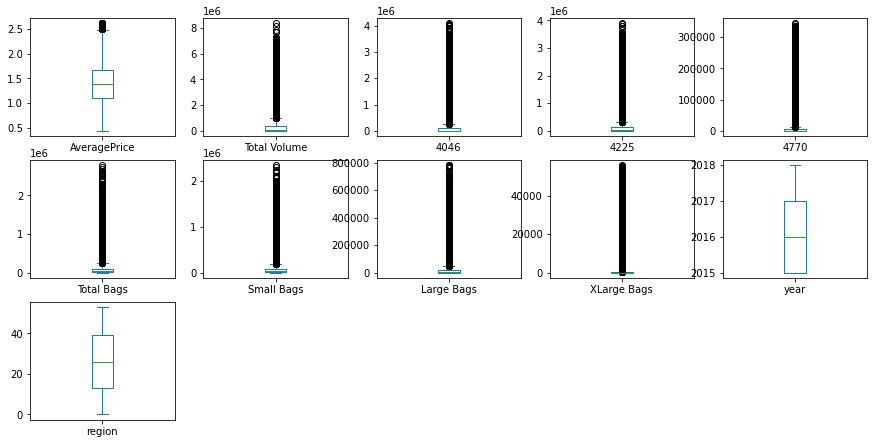

In [134]:
df.plot(kind='box',subplots= True,layout=(4,5),figsize=(15,10))

# SAPERATING COLUMNS INTO FEATURES AND TARGETS

# 1.) BY Average Price

In [135]:
x=df.drop("AveragePrice",axis=1)

In [136]:
y=df["AveragePrice"]

# SCALING BY MIN MAX SCALING

In [137]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [138]:
x=mms.fit_transform(x)

In [139]:
x

array([[7.67147114e-03, 2.53738579e-04, 1.39814180e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.55222091e-03, 1.65027730e-04, 1.14611253e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41269712e-02, 1.94500114e-04, 2.80244489e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.63615326e-03, 2.91718354e-04, 6.29759925e-04, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.92775069e-03, 3.73882232e-04, 7.65389424e-04, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.08133782e-03, 7.08485084e-04, 6.04942230e-04, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [140]:
xf=pd.DataFrame(data=x)
xf

,0,1,2,3,4,5,6,7,8,9
0,0.007671,0.000254,0.013981,0.000140,0.003125,0.003663,0.000119,0.0,0.0,0.0
1,0.006552,0.000165,0.011461,0.000169,0.003416,0.004005,0.000125,0.0,0.0,0.0
2,0.014127,0.000195,0.028024,0.000379,0.002927,0.003424,0.000132,0.0,0.0,0.0
3,0.009436,0.000277,0.018480,0.000211,0.002088,0.002417,0.000171,0.0,0.0,0.0
4,0.006093,0.000230,0.011256,0.000220,0.002222,0.002549,0.000253,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17646,0.002032,0.000501,0.000393,0.000000,0.004851,0.005563,0.000553,0.0,1.0,1.0
17647,0.001651,0.000292,0.000881,0.000000,0.003329,0.003806,0.000416,0.0,1.0,1.0
17648,0.001636,0.000292,0.000630,0.002113,0.003376,0.003981,0.000054,0.0,1.0,1.0
17649,0.001928,0.000374,0.000765,0.002110,0.003942,0.004649,0.000064,0.0,1.0,1.0


# MACHINE LEARNING MODEL

# RANDOM STATE

IMPORTANT LIBRARY

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [142]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state{i}, The training accuracy is : {r2_score(y_train,pred_train)}')
    print(f'At random state{i}, The test accuracy is : {r2_score(y_test,pred_test)}')
    print('\n')

At random state0, The training accuracy is : 0.1409862381638345
At random state0, The test accuracy is : 0.1341493122182128


At random state1, The training accuracy is : 0.14059611882088607
At random state1, The test accuracy is : 0.13483939256730482


At random state2, The training accuracy is : 0.14130323470202422
At random state2, The test accuracy is : 0.13322336975301186


At random state3, The training accuracy is : 0.13586791877669624
At random state3, The test accuracy is : 0.14393727695247527


At random state4, The training accuracy is : 0.1386654925353218
At random state4, The test accuracy is : 0.1383865992150386


At random state5, The training accuracy is : 0.13585057762409614
At random state5, The test accuracy is : 0.14450409620874016


At random state6, The training accuracy is : 0.13437145530115058
At random state6, The test accuracy is : 0.14779461578983188


At random state7, The training accuracy is : 0.13663904339292332
At random state7, The test accuracy is : 0.

AS WE CONCLUDE THAT 10th STATE GAVE HIGHEST VALUE, SO TAKE 10th AS RANDOM STATE

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [144]:
x_train.shape

(11826, 10)

In [145]:
y_train.shape

(11826,)

In [146]:
x_test.shape

(5825, 10)

In [147]:
y_test.shape

(5825,)

# MODEL BUILDING

1.) Linear Regression

In [148]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [149]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.2906559141878957
Mean squared error : 0.1264459480815585
Root Mean squared error : 0.35559239035946555
 R2 Score :
13.123186972776557


2.) Random Forest regressor

In [150]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [151]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.10982705579399138
Mean squared error : 0.0245280611776824
Root Mean squared error : 0.1566143709168555
 R2 Score :
83.14758347591055


3.) Decision Tree Regressor

In [152]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [153]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.1481802575107296
Mean squared error : 0.05038209442060086
Root Mean squared error : 0.2244595607689743
 R2 Score :
65.38413556695988


4.)Extra Tree Regressor

In [154]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred=etr.predict(x_test)

In [155]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.10111330472102999
Mean squared error : 0.021590908700429175
Root Mean squared error : 0.14693845208259537
 R2 Score :
85.165603432028


5.) XGB Regressor

In [156]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
pred=xg.predict(x_test)

In [157]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 0.12056418694406107
Mean squared error : 0.02674942839842405
Root Mean squared error : 0.16355252489162023
 R2 Score :
81.62135580607097


AS WE SEEN BEST ACCURACY IS GOT BY EXTRA TREE REGRESSOR MODEL :85%, SO WE WILL SELECT THAT MODEL

# CROSS VALIDATION TABEL

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
score=cross_val_score(lr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',lr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : -15.556986572818909
Difference in R2 & CV Score: 1637.320013087962


In [160]:
score=cross_val_score(rfr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',rfr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.14882354404255893
Difference in R2 & CV Score: 66.73900140181507


In [161]:
score=cross_val_score(dtr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',dtr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.6027784999684501
Difference in R2 & CV Score: 141.899205802916


In [164]:
score=cross_val_score(etr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',etr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.04241211323257434
Difference in R2 & CV Score: 77.38014448281353


extra tree regressor  is best model whith high accuracy

# HYPER PERAMETER TUNNING

In [165]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
GCV=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

best_model=GCV.best_estimator_
best_params= GCV.best_params_

pred= best_model.predict(x_test)

KeyboardInterrupt: 

In [ ]:
best_params

In [ ]:
final_mod=ExtraTreesRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2,n_estimators=300)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

AFTER TUNNING I GOT 87% WHICH IS GOOD

# SAVING THE MODEL 

In [237]:
import joblib
joblib.dump(final_mod,"AvocadoCaseStudy_average.pkl")

['AvocadoCaseStudy_average.pkl']

In [238]:
model=joblib.load("AvocadoCaseStudy_average.pkl")

#prediction
prediction=model.predict(x_test)
prediction

array([1.1033    , 1.0243    , 1.00746667, 0.73636667, 0.9129    ,
       1.16696667, 1.0377    , 1.1502    , 1.1754    , 1.04096667,
       0.75246667, 1.21123333, 1.18523333, 0.7692    , 1.16863333,
       1.1598    , 1.1372    , 1.0402    , 0.6959    , 1.06973333,
       1.3636    , 1.12073333, 1.15976667, 1.38203333, 0.84843333,
       1.052     , 1.2171    , 1.18543333, 1.18576667, 1.01936667,
       1.04263333, 1.2556    , 1.00043333, 1.15243333, 1.20213333,
       1.14963333, 0.78593333, 1.03216667, 0.99243333, 1.1393    ,
       1.07156667, 1.40363333, 1.3605    , 1.1384    , 1.03133333,
       1.12283333, 1.21073333, 1.37596667, 1.3384    , 1.10873333,
       1.1922    , 1.22316667, 0.8928    , 1.10786667, 0.7848    ,
       1.09243333, 1.18233333, 1.20006667, 1.1845    , 1.20103333,
       0.9641    , 1.09526667, 1.08253333, 0.73733333, 1.3792    ,
       0.90186667, 1.37273333, 1.32416667, 1.0261    , 1.04356667,
       0.92736667, 0.54196667, 1.2241    , 1.1902    , 1.21466

In [213]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
Predicted,1.1033,1.0243,1.007467,0.736367,0.9129,1.166967,1.0377,1.1502,1.1754,1.040967,...,1.304733,1.1456,1.339867,1.069667,0.8697,1.1217,1.345633,0.873533,1.034367,0.6124
Original,1.0800,0.9500,0.970000,0.670000,0.8100,1.150000,0.9800,1.1100,1.2200,1.050000,...,1.290000,1.2100,1.230000,1.050000,0.7300,0.9700,1.400000,0.890000,1.040000,0.6000


# 2.) PREDICTION BY REGION

In [214]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50])

# import libraries

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# SEPRATING TARGET AND TRANING DATA

In [216]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.drop('region', axis=1) # Features (all columns except for the target)
y = df['region'] # Target (the region column)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [217]:
X_train.shape

(1005, 10)

In [218]:
y_train.shape

(1005,)

In [219]:
X_test.shape

(431, 10)

In [220]:
y_test.shape

(431,)

# 2.1.) with MultinomialNB 

In [221]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
predmnb=mnb.predict(X_test)
predmnb

array([41, 19, 41, 10, 40, 11, 19,  2,  0, 41, 42, 32, 15, 10,  2,  8, 44,
       23, 31, 33, 30,  5,  5,  0, 42,  4, 13, 47,  2, 16, 12,  5,  9, 18,
       13, 26, 10, 29, 29,  5, 33, 46, 30, 30, 12, 13, 23, 13,  5, 42, 27,
       32,  3, 23, 17, 44,  2,  2, 26, 16, 11, 24, 44, 50, 46, 24, 46,  4,
        3, 25, 23, 31,  2, 32,  2,  0,  9,  0, 22, 27,  0,  2, 44,  8, 19,
       23, 20, 10,  2, 20, 22, 33, 31, 34,  1, 36, 15, 50, 21,  3, 18,  8,
       42, 38, 23,  4, 17, 12, 33, 33, 50,  3,  2, 32, 38, 37,  2, 25, 19,
       16, 17, 10, 41, 16, 41, 36, 20,  0, 27, 13,  7,  5, 43, 28,  9, 42,
       32, 20,  5, 45, 11, 11, 10, 23, 47, 32,  3, 16,  7, 29,  2,  2, 32,
       13, 42, 36, 40, 12,  7, 31,  1, 24, 44,  5, 38, 22, 35,  0,  0,  8,
       44, 30,  9,  0, 39, 17, 16, 33,  5, 49,  2,  8,  1,  7, 22,  2, 26,
       16, 36, 38,  7,  0,  3, 17, 38,  9, 28, 26, 19,  2, 46, 23, 25,  2,
        5,  7, 35, 23, 22,  0, 37, 41, 16, 11, 17, 12, 50,  5,  3,  9, 30,
       11, 16, 40, 50, 15

In [222]:
print(accuracy_score(y_test,predmnb)*100)
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

70.76566125290023
[[18  0  0 ...  0  0  0]
 [ 0  7  0 ...  2  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       1.00      0.41      0.58        17
           2       1.00      1.00      1.00        23
           3       0.85      0.63      0.72        27
           4       0.62      0.44      0.52        18
           5       1.00      0.83      0.91        18
           6       0.00      0.00      0.00         7
           7       0.69      0.82      0.75        11
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       0.27      0.67      0.38         6
          11       0.78      1.00      0.88         7
          12       1.00      0.79      0.88        14
          13       0.40      0.67      0.50         6
          14   

# 2.2.) Decision tree Classifier

In [223]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
preddtc

array([41, 19, 25, 31, 40, 11, 19,  2,  0, 41, 42, 32, 15, 10,  2,  8, 44,
        1, 31, 33, 30,  5,  5,  0, 42,  4, 13, 47,  2,  0, 12,  5,  9, 18,
       13, 26, 17, 19, 19,  5, 43, 46,  0, 18, 12, 13, 23, 30,  5,  6,  4,
       32,  3,  1, 17, 44,  2,  2, 26, 16, 49, 24, 44, 50, 46,  6, 46,  0,
       12,  3, 23, 31,  8, 32,  2,  0,  9,  0, 22, 26,  0,  2, 44,  8, 19,
        1, 20, 38,  2, 38, 22, 33, 31, 34,  1, 34, 15,  3, 42,  3, 18,  8,
       49,  6, 23,  4, 10, 12, 33, 33,  3,  3,  2, 18, 38, 37,  2, 25, 19,
       26, 42, 17, 41,  0, 41, 36, 20,  0, 27,  4,  7,  5, 43, 28,  9, 42,
       32, 31,  5, 37, 11, 11, 42,  1, 19, 32,  3, 16,  7, 29,  2,  2, 32,
        5,  6, 31, 40, 12,  3, 10,  1, 24, 31,  5, 38, 22,  7,  0, 32,  8,
       44, 30,  9,  0, 44, 17, 16, 33,  5, 42,  2,  8,  1, 35, 22,  2, 26,
       26, 36, 38,  7,  0,  3, 17, 38,  9,  4, 26, 19,  2, 44,  1, 25,  2,
        5, 35,  7, 47, 22,  0, 37, 41, 28, 11, 42, 12, 50,  5,  3,  9, 27,
       11, 28, 40,  3, 15

In [258]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

90.71925754060325
[[23  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.89      1.00      0.94        17
           2       0.95      0.91      0.93        23
           3       1.00      0.93      0.96        27
           4       1.00      0.89      0.94        18
           5       1.00      1.00      1.00        18
           6       0.88      1.00      0.93         7
           7       0.75      0.82      0.78        11
           8       0.78      0.88      0.82         8
           9       1.00      1.00      1.00         9
          10       0.80      0.67      0.73         6
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00         6
          14   

# 2.3.)  KNeighborsClassifier

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
predknn

array([41, 29, 19, 10, 34, 11, 19,  2,  0, 41, 42, 32, 15, 10,  2,  8, 44,
        1, 31, 33, 30,  5,  5,  0, 42,  4,  5, 47,  2,  0, 12,  5,  9, 18,
       13, 26, 17, 19, 19,  5, 33, 46,  0, 18, 12, 13, 29,  2,  5,  6,  4,
       22,  3,  1, 17, 44,  2,  2, 26, 16, 49, 24, 44, 50, 46,  6, 46,  0,
       12,  3, 50, 31,  2, 22,  2,  0,  9,  0, 22,  4,  0,  2, 44,  8, 19,
        1, 20, 38,  2, 38, 22, 33, 31, 34, 23, 38, 15,  3, 42,  3,  0,  8,
        6, 42,  1,  4, 17, 12, 33, 33,  3,  3,  2, 18, 38, 37,  2, 25, 19,
       26,  6, 31, 47,  0, 41, 36, 20,  0, 27, 28,  7,  5, 43, 28,  9, 42,
       22, 17,  5, 45, 11, 11, 42,  1, 19, 32,  3, 16,  7, 29,  2,  2, 22,
        5,  6, 34, 34, 12,  3, 31, 29, 14, 38,  5, 38, 22,  7,  0,  0,  8,
       44, 30,  9,  0, 44, 17, 28, 33, 13, 42, 26,  8,  1,  7, 22,  2, 26,
       26, 36, 38,  7,  0,  3, 17, 38,  9, 28, 26, 19,  2,  5,  1, 25,  2,
       13, 35, 35, 23, 22,  0, 37, 41, 28, 11,  6, 12, 50,  5,  3,  9, 27,
       11, 28, 40,  3, 15

In [259]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

83.75870069605568
[[24  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.70      0.82      0.76        17
           2       0.91      0.91      0.91        23
           3       1.00      1.00      1.00        27
           4       0.73      0.61      0.67        18
           5       0.88      0.78      0.82        18
           6       0.50      0.86      0.63         7
           7       1.00      1.00      1.00        11
           8       1.00      0.88      0.93         8
           9       0.90      1.00      0.95         9
          10       0.75      0.50      0.60         6
          11       1.00      1.00      1.00         7
          12       1.00      0.86      0.92        14
          13       0.60      0.50      0.55         6
          14   

# 2.4.)SVC

In [229]:
from sklearn.svm import SVC

In [230]:
sv=SVC()
sv.fit(X_train,y_train)
predsv=sv.predict(X_test)
predsv

array([ 1,  0,  0, 31,  2,  4,  0,  2,  0,  1,  6,  0,  0, 31,  2,  2,  0,
        1, 31, 31,  4,  0,  0,  0, 42,  4,  0,  0,  2,  0,  9,  0,  0,  0,
        0, 26, 31,  0,  0,  0, 31,  0,  0,  0,  1,  0,  1,  4,  0, 42,  4,
        0,  0,  1, 31,  0,  2,  2, 26,  0, 49, 24,  0, 31,  0,  6,  0,  0,
        0,  0,  1, 31,  4,  0,  2,  0,  0,  0,  0,  4,  0,  2,  0,  2,  0,
        1,  0,  1,  2,  1,  0, 31, 31,  4,  1,  1,  0,  0, 42,  0,  0,  2,
        6, 42,  1,  4, 31,  1, 31, 31,  0,  0,  2,  0,  1,  0,  2,  0,  0,
       26, 42, 31,  1,  0,  9,  0,  0,  0, 27,  4,  0,  0, 43,  4,  0, 42,
        0, 31,  0,  0,  4,  4,  6,  1,  0,  0,  0,  0,  0,  0,  2,  2,  0,
        0,  6,  1,  1,  0,  0, 31,  1, 14,  1,  0,  1,  0,  0,  0,  0,  2,
        0,  4,  0,  0,  0, 31,  4, 31,  0, 42, 26,  2,  1,  0,  0,  2, 26,
       26,  0,  1,  0,  0,  0, 31,  1,  0,  4, 26,  0,  2,  0,  1,  0,  2,
        0,  0,  0,  1,  0,  0,  0,  9,  4,  2,  6,  0, 31,  0,  0,  0, 27,
        4,  4,  1,  0,  0

In [260]:
print(accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

29.930394431554525
[[25  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 5  5  0 ...  0  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.22        25
           1       0.26      1.00      0.41        17
           2       0.60      0.91      0.72        23
           3       0.00      0.00      0.00        27
           4       0.53      1.00      0.69        18
           5       0.00      0.00      0.00        18
           6       0.31      0.57      0.40         7
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        14
          13       0.00      0.00      0.00         6
          14  

# CROSS VALDIATION

In [232]:
from sklearn.model_selection import cross_val_score

Multinomial 

In [261]:
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.27777778 0.31010453 0.32404181 0.27526132 0.2195122 ]
0.2813395276809911
0.03611969014969352


SVC

In [262]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.58680556 0.62369338 0.65505226 0.61672474 0.53658537]
0.6037722609368952
0.039990509912874686


KNN

In [263]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.95138889 0.99303136 0.97909408 0.98954704 0.90940767]
0.9644938056523422
0.031181552254568614


DECISION TREE CLASSIFIER

In [264]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.93402778 0.96864111 0.95470383 0.94773519 0.93031359]
0.9470843012001549
0.013963572153968823


 as we seen DTC GAVES HISEGST SCORE

# SAVING THE BEST MODEL

In [273]:
import joblib

# Save model to file
joblib.dump(dtc, 'avocado_casestudy_region.pkl')


['avocado_casestudy_region.pkl']

# LOAD THE MODEL

In [274]:
modelr=joblib.load("avocado_casestudy_region.pkl")

In [275]:
predict=modelr.predict(X_test)
predict

array([41, 19, 25, 31, 40, 11, 19,  2,  0, 41, 42, 32, 15, 10,  2,  8, 44,
        1, 31, 33, 30,  5,  5,  0, 42,  4, 13, 47,  2,  0, 12,  5,  9, 18,
       13, 26, 17, 19, 19,  5, 43, 46,  0, 18, 12, 13, 23, 30,  5,  6,  4,
       32,  3,  1, 17, 44,  2,  2, 26, 16, 49, 24, 44, 50, 46,  6, 46,  0,
       12,  3, 23, 31,  8, 32,  2,  0,  9,  0, 22, 26,  0,  2, 44,  8, 19,
        1, 20, 38,  2, 38, 22, 33, 31, 34,  1, 34, 15,  3, 42,  3, 18,  8,
       49,  6, 23,  4, 10, 12, 33, 33,  3,  3,  2, 18, 38, 37,  2, 25, 19,
       26, 42, 17, 41,  0, 41, 36, 20,  0, 27,  4,  7,  5, 43, 28,  9, 42,
       32, 31,  5, 37, 11, 11, 42,  1, 19, 32,  3, 16,  7, 29,  2,  2, 32,
        5,  6, 31, 40, 12,  3, 10,  1, 24, 31,  5, 38, 22,  7,  0, 32,  8,
       44, 30,  9,  0, 44, 17, 16, 33,  5, 42,  2,  8,  1, 35, 22,  2, 26,
       26, 36, 38,  7,  0,  3, 17, 38,  9,  4, 26, 19,  2, 44,  1, 25,  2,
        5, 35,  7, 47, 22,  0, 37, 41, 28, 11, 42, 12, 50,  5,  3,  9, 27,
       11, 28, 40,  3, 15

In [276]:
dp=pd.DataFrame([modelr.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

In [277]:
dpt=dp.transpose()

In [278]:
dpt["Predicted"].sum()

8806

In [279]:
dpt["Original"].sum()

8666

In [281]:
prediction_percentage=(100-((8666-8462)/8666)*100)
prediction_percentage

97.64597276713593

# END PROJECT